In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt


import seaborn as sns


In [5]:
df = pd.read_csv("/home/job/Downloads/USArrests.csv")
df


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [8]:

target = df['Unnamed: 0']


print(df.head(), end='\n\n')

print(df.isnull().sum(), end='\n\n')

print(df.info())


   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [12]:


df.describe().T




,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


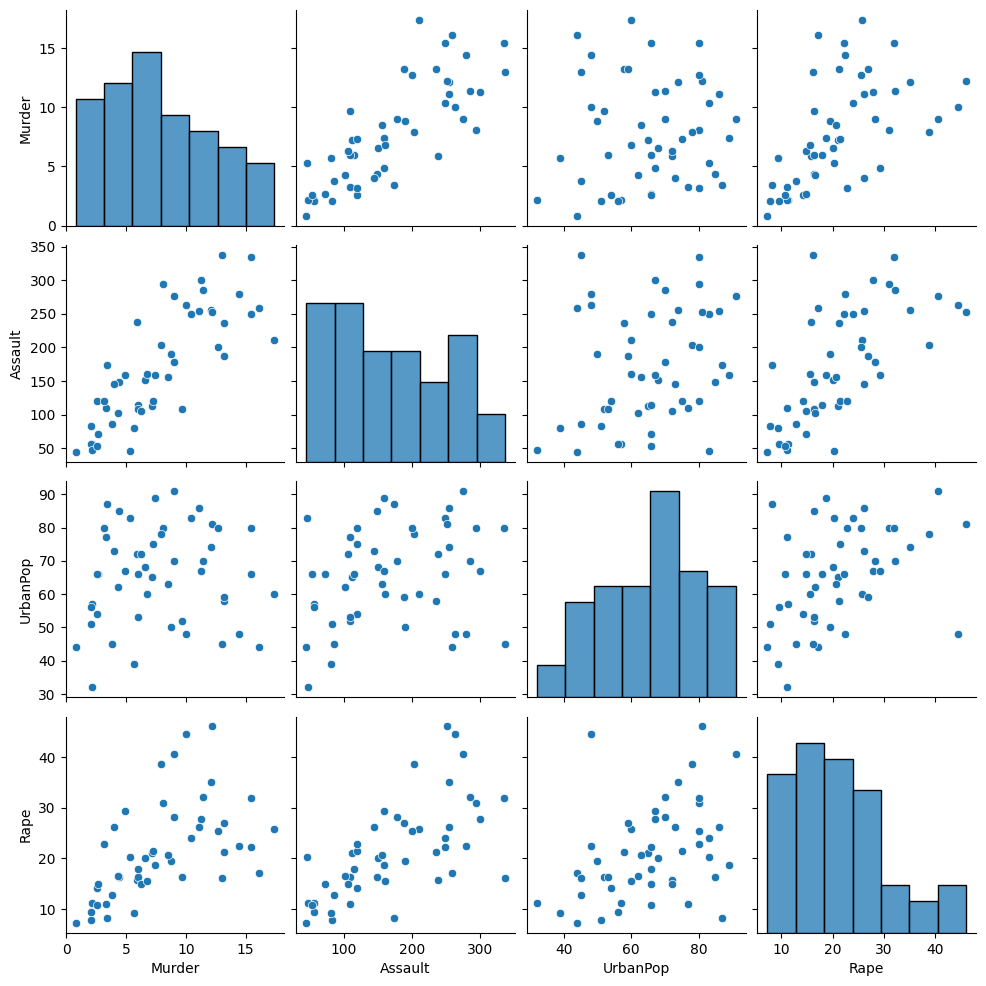

In [13]:
sns.pairplot(df)

In [14]:
df.corr()

/tmp/ipykernel_13594/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


/tmp/ipykernel_13594/491578265.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),  annot=True,  linewidth=2)


<AxesSubplot:>

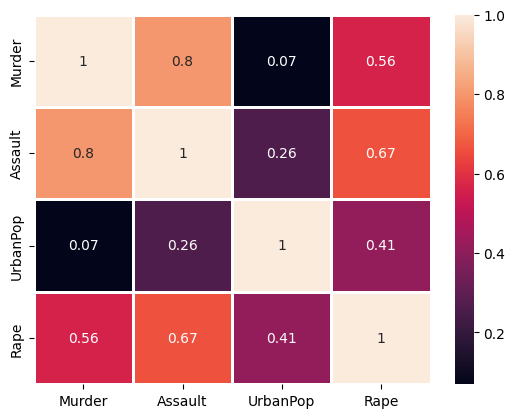

In [20]:
sns.heatmap(df.corr(),  annot=True,  linewidth=2)


In [21]:
X = df.iloc[:,1:].values
sc = StandardScaler()
sc.fit(X)

StandardScaler()

/home/job/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/job/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/job/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/job/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/job/.local/lib/python3.10/site-package

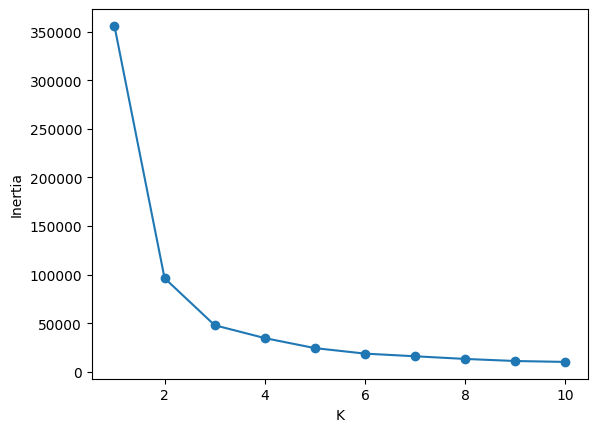

In [22]:
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r)
    kmeans.fit(x)    
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=123):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1,max_k+1)]
    plt.plot(range(1,11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

elbow_Kmeans(X)


In [23]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

y_kmeans


/home/job/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 0, 2,
       3, 2, 0, 1, 1, 2, 3, 0, 2, 2, 2, 3, 1, 0, 0, 1, 0, 2, 3, 0, 0, 1,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [30]:
cluster = list(y_kmeans)
df['KMeans_cluster'] = cluster
cluster_mean = pd.DataFrame(round(df.groupby('KMeans_cluster').mean(),0))
cluster_mean



/tmp/ipykernel_13594/2332913404.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_mean = pd.DataFrame(round(df.groupby('KMeans_cluster').mean(),0))


,Murder,Assault,UrbanPop,Rape,Agg_cluster
KMeans_cluster,,,,,
0,8.0,173.0,71.0,23.0,2.0
1,6.0,112.0,66.0,17.0,0.0
2,12.0,273.0,68.0,28.0,1.0
3,3.0,63.0,54.0,12.0,0.0


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

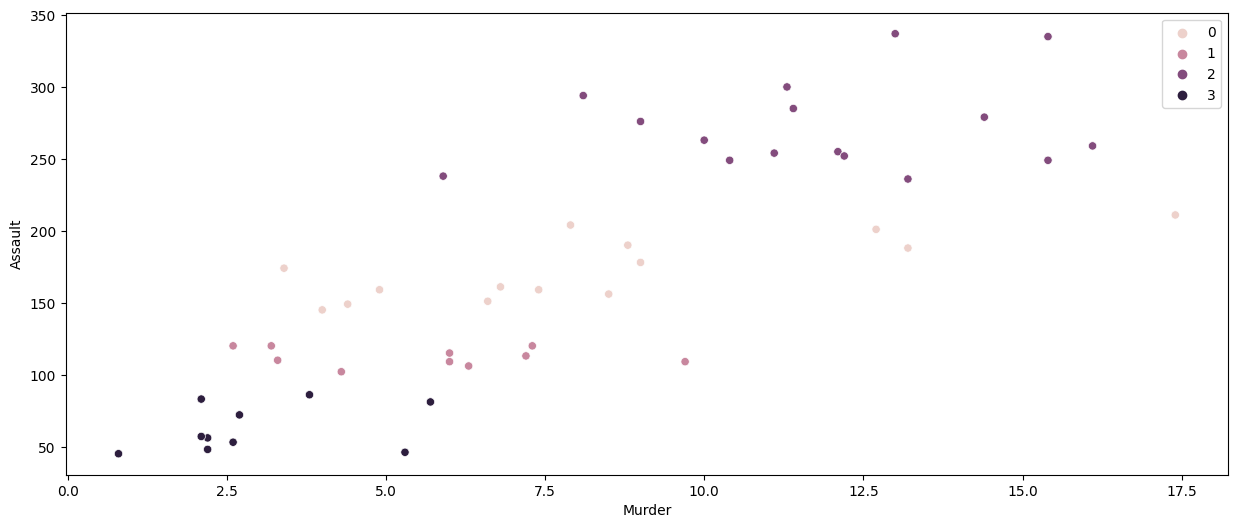

In [24]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['Murder'], y = df['Assault'],hue=y_kmeans)

In [25]:
AC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')


In [26]:
y_pred = AC.fit_predict(X)

y_pred


/home/job/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

<AxesSubplot:xlabel='Murder', ylabel='Assault'>

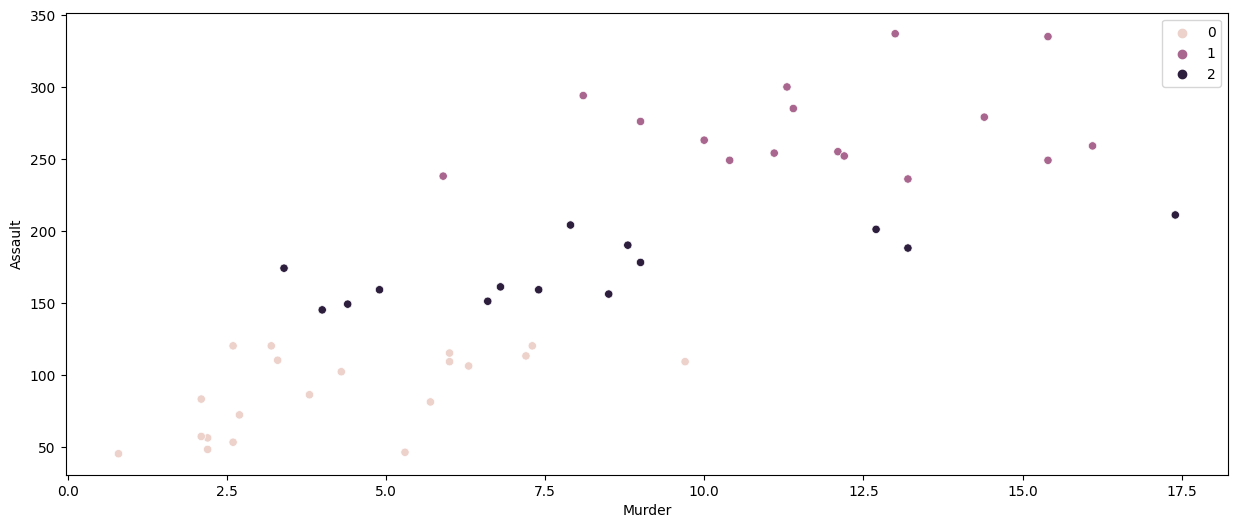

In [27]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['Murder'], y = df['Assault'],hue=y_pred)

In [28]:
cluster2 = list(y_pred)
df['Agg_cluster'] = cluster2
cluster_mean2 = pd.DataFrame(round(df.groupby('Agg_cluster').mean(),0))
cluster_mean2

/tmp/ipykernel_13594/3582449247.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_mean2 = pd.DataFrame(round(df.groupby('Agg_cluster').mean(),0))


,Murder,Assault,UrbanPop,Rape
Agg_cluster,,,,
0,4.0,88.0,60.0,14.0
1,12.0,273.0,68.0,28.0
2,8.0,173.0,71.0,23.0


In [31]:
cluster_mean2 = pd.DataFrame(round(df.groupby('KMeans_cluster').mean(),0))
cluster_mean2

/tmp/ipykernel_13594/3746801855.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_mean2 = pd.DataFrame(round(df.groupby('KMeans_cluster').mean(),0))


,Murder,Assault,UrbanPop,Rape,Agg_cluster
KMeans_cluster,,,,,
0,8.0,173.0,71.0,23.0,2.0
1,6.0,112.0,66.0,17.0,0.0
2,12.0,273.0,68.0,28.0,1.0
3,3.0,63.0,54.0,12.0,0.0


Text(0, 0.5, 'Variance Explained')

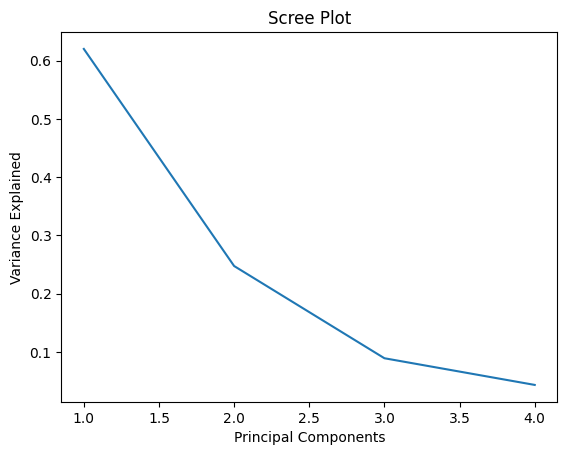

In [34]:
# define PCA model to use
X = StandardScaler().fit_transform(df.iloc[:,1:5])
df_scaled = pd.DataFrame(X, columns = df.columns[1:5])
df_scaled.head()


from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_fit = pca.fit(df_scaled)
PC_values = np.arange(pca.n_components_) + 1
sns.lineplot(x = PC_values, y = pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')



In [35]:
print(pca.explained_variance_ratio_)

[0.62006039 0.24744129 0.0891408  0.04335752]


Text(0, 0.5, ' Cumulative Explained Variance')

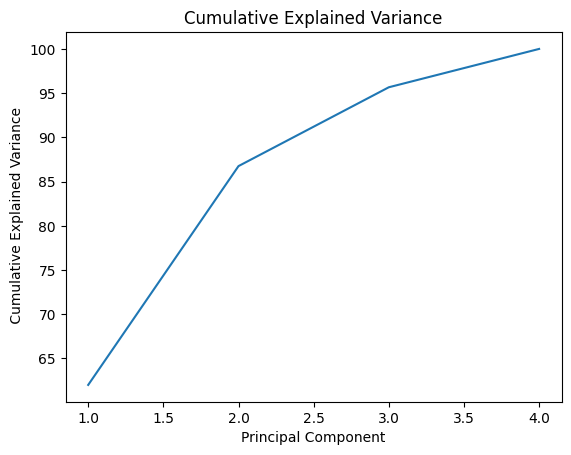

In [36]:
sns.lineplot(x = PC_values, y = np.cumsum(pca.explained_variance_ratio_)*100)

plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel(' Cumulative Explained Variance')